<a href="https://colab.research.google.com/github/arbi11/ProjectGroup-Shap/blob/main/VAE_Oct18_latent_aritmetic_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

from scipy.stats import norm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive


In [ ]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
colab= True

if colab == True:

  df_raw_hold = pd.read_csv('/content/drive/MyDrive/PiDrive/Notes_GD/Important Notebooks/df_Ucore_hold_AE.csv')
  df_raw_CW_max = pd.read_csv('df_Ucore_CW_AE.csv')
  df_raw_ACW_max = pd.read_csv('/content/drive/MyDrive/PiDrive/Notes_GD/Important Notebooks/df_Ucore_ACW_AE.csv')


In [ ]:
if colab == False:

  df_raw_hold = pd.read_csv('df_Ucore_hold_AE.csv')
  df_raw_CW_max = pd.read_csv('df_Ucore_CW_AE.csv')
  df_raw_ACW_max = pd.read_csv('df_Ucore_ACW_AE.csv')

# Data Preparation

In [ ]:
print(df_raw_hold.shape, df_raw_CW_max.shape, df_raw_ACW_max.shape)

(16264, 37) (8069, 37) (8328, 37)


In [ ]:
print(df_raw_ACW_max.columns)

Index(['Unnamed: 0', 'I_S1', 'I_S2', 'I_S3', 'I_S4', 'I_S5', 'I_S6', 'I_S7',
       'I_S8', 'I_S9', 'I_S10', 'I_S11', 'I_S12', 'I_S13', 'I_S14', 'I_S15',
       'I_S16', 'I_S17', 'I_S18', 'I_S19', 'I_S20', 'I_S21', 'I_S22', 'I_S23',
       'I_S24', 'I_S25', 'I_S26', 'I_S27', 'I_S28', 'I_S29', 'I_S30', 'I_S31',
       'I_R3', 'I_R4', 'I_R5', 'rotor_displacement', 'total_torque'],
      dtype='object')


In [ ]:
if 'Unnamed: 0' in df_raw_hold.columns:
    df_raw_hold.drop('Unnamed: 0', axis=1, inplace=True)
    df_raw_hold.dropna(inplace=True)
if 'Unnamed: 0' in df_raw_CW_max.columns:
    df_raw_CW_max.drop('Unnamed: 0', axis=1, inplace=True)
    df_raw_CW_max.dropna(inplace=True)
if 'Unnamed: 0' in df_raw_ACW_max.columns:
    df_raw_ACW_max.drop('Unnamed: 0', axis=1, inplace=True)
    df_raw_ACW_max.dropna(inplace=True)

In [ ]:
df_raw_hold.head()

,I_S1,I_S2,I_S3,I_S4,I_S5,I_S6,I_S7,I_S8,I_S9,I_S10,...,I_S27,I_S28,I_S29,I_S30,I_S31,I_R3,I_R4,I_R5,rotor_displacement,total_torque
1,-2,2,0,-2,-2,2,0,-2,-2,-2,...,0,-2,0,2,-2,2,-2,2,0.1,10.901654
2,2,-2,-2,-2,-2,2,0,-2,-2,0,...,0,-2,2,2,2,2,-2,2,0.1,-25.731834
3,0,0,0,-2,0,0,2,-2,-2,0,...,-2,-2,0,2,0,2,-2,2,0.1,-0.110361
4,-2,2,0,2,0,0,2,0,2,2,...,-2,0,0,-2,2,2,-2,2,0.1,-20.269265
5,0,-2,0,2,2,2,-2,0,2,2,...,-2,2,-2,-2,0,2,-2,2,0.1,-22.180011


In [ ]:
for col in df_raw_ACW_max.columns:
    print(col, df_raw_ACW_max[col].unique())

I_S1 [ 0  2 -2]
I_S2 [ 0 -2  2]
I_S3 [ 2  0 -2]
I_S4 [-2  2  0]
I_S5 [ 0 -2  2]
I_S6 [ 2 -2  0]
I_S7 [ 2 -2  0]
I_S8 [ 0  2 -2]
I_S9 [ 0  2 -2]
I_S10 [ 0 -2  2]
I_S11 [-2  2  0]
I_S12 [ 2  0 -2]
I_S13 [ 0  2 -2]
I_S14 [ 0  2 -2]
I_S15 [ 0  2 -2]
I_S16 [ 0  2 -2]
I_S17 [ 0 -2  2]
I_S18 [-2  2  0]
I_S19 [ 0  2 -2]
I_S20 [ 2  0 -2]
I_S21 [-2  2  0]
I_S22 [ 2  0 -2]
I_S23 [-2  0  2]
I_S24 [ 0 -2  2]
I_S25 [-2  0  2]
I_S26 [ 0  2 -2]
I_S27 [ 2  0 -2]
I_S28 [ 2  0 -2]
I_S29 [ 0  2 -2]
I_S30 [ 0  2 -2]
I_S31 [ 2 -2  0]
I_R3 [2]
I_R4 [-2]
I_R5 [2]
rotor_displacement [0.1]
total_torque [ -50.82117279  -22.95570808   -8.5590535  ... -289.05611333 -311.35216568
 -306.73828911]


In [ ]:
df_raw_CW_max.head()

,I_S1,I_S2,I_S3,I_S4,I_S5,I_S6,I_S7,I_S8,I_S9,I_S10,...,I_S27,I_S28,I_S29,I_S30,I_S31,I_R3,I_R4,I_R5,rotor_displacement,total_torque
1,-2,2,0,-2,0,-2,-2,0,0,0,...,-2,0,0,0,-2,2,-2,2,0.1,-16.627452
2,-2,2,-2,-2,2,-2,0,-2,2,-2,...,2,2,0,-2,0,2,-2,2,0.1,145.460277
3,-2,2,2,2,2,0,2,0,-2,0,...,0,2,2,0,-2,2,-2,2,0.1,-57.427631
4,2,0,-2,0,-2,0,2,2,2,2,...,2,2,0,2,-2,2,-2,2,0.1,-27.138014
5,-2,0,0,0,0,2,0,0,0,-2,...,-2,0,-2,2,0,2,-2,2,0.1,-89.575236


In [ ]:
df_raw_ACW_max.head()

,I_S1,I_S2,I_S3,I_S4,I_S5,I_S6,I_S7,I_S8,I_S9,I_S10,...,I_S27,I_S28,I_S29,I_S30,I_S31,I_R3,I_R4,I_R5,rotor_displacement,total_torque
1,0,0,2,-2,0,2,2,0,0,0,...,2,2,0,0,2,2,-2,2,0.1,-50.821173
2,2,-2,2,-2,0,2,-2,2,2,-2,...,0,2,2,0,2,2,-2,2,0.1,-22.955708
3,2,-2,0,2,0,-2,2,-2,0,2,...,0,0,2,2,-2,2,-2,2,0.1,-8.559054
4,-2,2,0,-2,-2,-2,2,2,0,0,...,2,2,0,-2,2,2,-2,2,0.1,78.718668
5,0,0,2,2,0,2,0,-2,2,-2,...,0,0,-2,2,2,2,-2,2,0.1,17.213636


In [ ]:
cols_all = list(df_raw_hold.columns)
cols = cols_all[:-5]
cols

['I_S1',
 'I_S2',
 'I_S3',
 'I_S4',
 'I_S5',
 'I_S6',
 'I_S7',
 'I_S8',
 'I_S9',
 'I_S10',
 'I_S11',
 'I_S12',
 'I_S13',
 'I_S14',
 'I_S15',
 'I_S16',
 'I_S17',
 'I_S18',
 'I_S19',
 'I_S20',
 'I_S21',
 'I_S22',
 'I_S23',
 'I_S24',
 'I_S25',
 'I_S26',
 'I_S27',
 'I_S28',
 'I_S29',
 'I_S30',
 'I_S31']

In [ ]:
df_ACW_max = df_raw_ACW_max.drop_duplicates(subset=cols, ignore_index=True)
df_CW_max = df_raw_CW_max.drop_duplicates(subset=cols, ignore_index=True)
df_hold = df_raw_hold.drop_duplicates(subset=cols, ignore_index=True)

In [ ]:
print(df_hold.shape, df_CW_max.shape, df_ACW_max.shape)

(16263, 36) (8068, 36) (8327, 36)


In [ ]:
df = df_hold.append((df_ACW_max, df_CW_max), ignore_index=True)

In [ ]:
df = df.sample(frac=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(32658, 36)

In [ ]:
df_SR = df[cols]
df_SR.shape

(32658, 31)

In [ ]:
df_SR.head()

,I_S1,I_S2,I_S3,I_S4,I_S5,I_S6,I_S7,I_S8,I_S9,I_S10,...,I_S22,I_S23,I_S24,I_S25,I_S26,I_S27,I_S28,I_S29,I_S30,I_S31
10712,-2,0,2,2,0,0,0,0,2,0,...,-2,-2,2,2,0,2,2,0,2,0
31744,-2,0,2,-2,2,-2,2,-2,2,-2,...,-2,0,-2,2,-2,2,-2,2,-2,2
11751,0,0,0,2,-2,-2,0,0,2,0,...,0,0,2,2,0,2,2,2,2,2
28519,0,0,2,-2,2,-2,0,-2,2,-2,...,0,0,0,2,-2,2,-2,2,0,0
16096,2,0,0,0,0,0,2,2,0,2,...,2,0,2,0,0,0,0,0,0,2


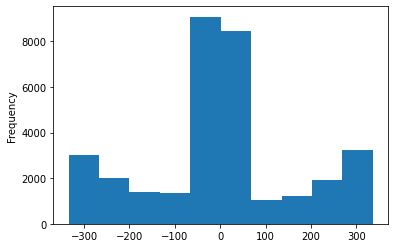

In [ ]:
df['total_torque'].plot(kind='hist')

# Neural nets based model

In [ ]:
model = keras.Sequential([
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.002),), 
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.002),),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.002),),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.002),),
        layers.Dense(1)
    ])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])

In [ ]:
model = keras.Sequential([
        layers.Dense(512, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        # layers.Dropout(0.5),
        layers.Dense(512, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        # layers.Dropout(0.5),
        layers.Dense(128, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        # layers.Dropout(0.5),
        layers.Dense(128, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        layers.Dense(64, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        layers.Dense(64, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        layers.Dense(64, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        layers.Dense(64, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        layers.Dense(64, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        layers.Dense(64, activation="relu", kernel_initializer=initializers.GlorotUniform()),
        layers.Dense(1)
    ])
model.compile(optimizer=keras.optimizers.Adam(), loss="mse", metrics=["mae"])

In [ ]:
from sklearn.model_selection import train_test_split

X = df_SR
y = df[cols_all[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2) # 70% training and 30% test

In [ ]:

scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import os
cwd = os.getcwd()

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=20,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
    keras.callbacks.TensorBoard(
        log_dir=os.path.join(cwd, 'tb_runs'),
    )
]

In [ ]:
epochs = 500
history = model.fit(X_scaled, y_train.values,
          epochs=epochs, batch_size=256, verbose=0,
          validation_data=(X_test_scaled, y_test.values),
          callbacks=callbacks_list,
          )

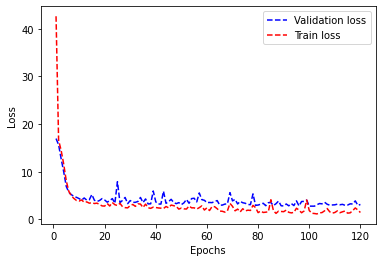

In [ ]:
val_loss = history.history["val_mae"]
loss = history.history["mae"]

epochs = range(1, len(loss)+1)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.plot(epochs, loss, "r--",
         label="Train loss")
# plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
model.predict(X_test)

array([[-392.97107 ],
       [-218.30937 ],
       [ -12.527869],
       ...,
       [  -9.503323],
       [ 429.0158  ],
       [  18.871037]], dtype=float32)

#SHAP

In [ ]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 32.9 MB/s 


In [ ]:
import shap
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Code for checking

In [ ]:
X,y = shap.datasets.iris(display=True)

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)


In [ ]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(X,test_size=0.2, random_state=0)
Y_train,Y_test = train_test_split(y, test_size=0.2, random_state=0)

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
accuracy_score(Y_test, y_pred)

0.78125

In [ ]:
explainer = shap.KernelExplainer(svc.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/32 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



In [ ]:
len(shap_values)

2

In [ ]:
shap_values[0].shape

(32, 18)

In [ ]:
X_test.shape

(32, 18)

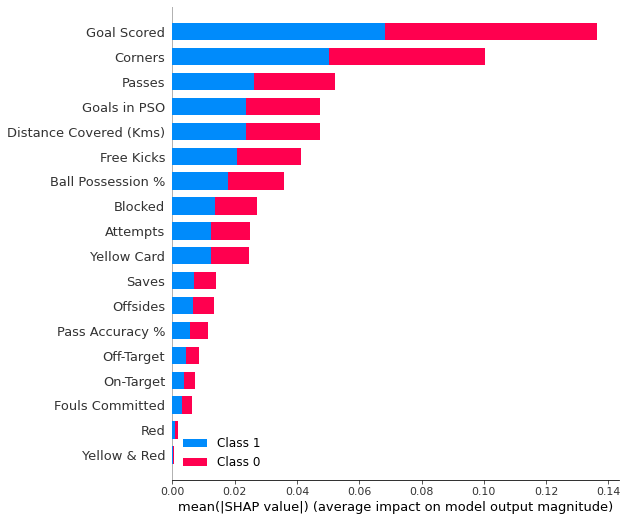

In [ ]:
shap.summary_plot(shap_values,X_test)


In [ ]:
explainer.expected_value[1]

0.5100322715275721

In [ ]:
explainer.expected_value[0]

0.48996772847242803

In [ ]:
explainer.expected_value[2]

IndexError: ignored

In [ ]:
shap_values[0].shape

(30, 4)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

IndexError: ignored

In [ ]:
explainer.expected_value

array([0.48996773, 0.51003227])

In [ ]:
shap_values[0,:]

TypeError: ignored

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:]  ,X_test[0,:])

TypeError: ignored

## Code for gd

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(5,),activation='identity', max_iter=1000,learning_rate='invscaling',random_state=0)

In [ ]:
model.fit(X_train,y_train)


MLPRegressor(activation='identity', hidden_layer_sizes=(5,),
             learning_rate='invscaling', max_iter=1000, random_state=0)

(array([2097., 1426.,  949.,  915., 6259., 5980.,  769.,  845., 1293.,
        2327.]),
 array([-3.33450373e+02, -2.66732534e+02, -2.00014695e+02, -1.33296856e+02,
        -6.65790166e+01,  1.38822586e-01,  6.68566618e+01,  1.33574501e+02,
         2.00292340e+02,  2.67010179e+02,  3.33728019e+02]),
 <a list of 10 Patch objects>)

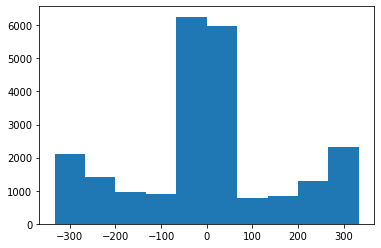

In [ ]:
plt.hist(y_train)

In [ ]:
y_train_200_300 = y_train[(y_train > 250) & (y_train < 300)]
y_train_200_300.describe()

count    1639.000000
mean      278.391396
std        14.162140
min       250.060322
25%       266.778262
50%       280.285530
75%       290.658300
max       299.992538
Name: total_torque, dtype: float64

In [ ]:
y_train_200_300.index.min()

26638

In [ ]:
y_train_200_300.index[0]

30433

In [ ]:
X_train_200_300 = X_train.loc[y_train_200_300.index, :]
X_train_200_300.iloc[0]

I_S1    -2
I_S2     0
I_S3     0
I_S4    -2
I_S5     2
I_S6    -2
I_S7     2
I_S8    -2
I_S9     2
I_S10   -2
I_S11    2
I_S12   -2
I_S13    2
I_S14    2
I_S15    0
I_S16   -2
I_S17    0
I_S18   -2
I_S19    0
I_S20   -2
I_S21    0
I_S22   -2
I_S23    0
I_S24   -2
I_S25    0
I_S26   -2
I_S27    2
I_S28   -2
I_S29    0
I_S30   -2
I_S31    0
Name: 30433, dtype: int64

In [ ]:
y_test_200_300 = y_test[(y_test > 250) & (y_test < 300)]
y_test_200_300.describe()

count    713.000000
mean     278.572425
std       14.255406
min      250.081022
25%      267.460702
50%      280.465246
75%      291.314467
max      299.994582
Name: total_torque, dtype: float64

In [ ]:
y_test_200_300.index

Int64Index([29684, 28835, 31857, 30750, 30889, 32366, 29509, 29956, 28340,
            31952,
            ...
            30689, 29441, 29603, 28988, 29204, 29959, 31715, 29805, 32370,
            28907],
           dtype='int64', length=713)

In [ ]:
y_test_200_300.iloc[1]

253.15801188813455

In [ ]:
X_test_200_300 = X_test.loc[y_test_200_300.index, :]

In [ ]:
X_test_200_300.iloc[1]

I_S1    -2
I_S2     0
I_S3    -2
I_S4    -2
I_S5     0
I_S6    -2
I_S7     2
I_S8    -2
I_S9     2
I_S10   -2
I_S11    2
I_S12   -2
I_S13    2
I_S14    2
I_S15    0
I_S16   -2
I_S17   -2
I_S18   -2
I_S19    2
I_S20   -2
I_S21    0
I_S22    2
I_S23    2
I_S24   -2
I_S25    2
I_S26   -2
I_S27    2
I_S28   -2
I_S29    2
I_S30   -2
I_S31    2
Name: 28835, dtype: int64

In [ ]:
explainer = shap.KernelExplainer(model.predict, X_train_200_300)


X does not have valid feature names, but MLPRegressor was fitted with feature names
Using 1639 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
X_test_200_300.shape

(713, 31)

In [ ]:
shap_values = explainer.shap_values(X_test_200_300.iloc[:10,:],nsamples=100)


  0%|          | 0/10 [00:00<?, ?it/s]

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
The default of 'normalize' will be se

In [ ]:
shap_values.shape

(10, 31)

In [ ]:
features = df_SR.columns

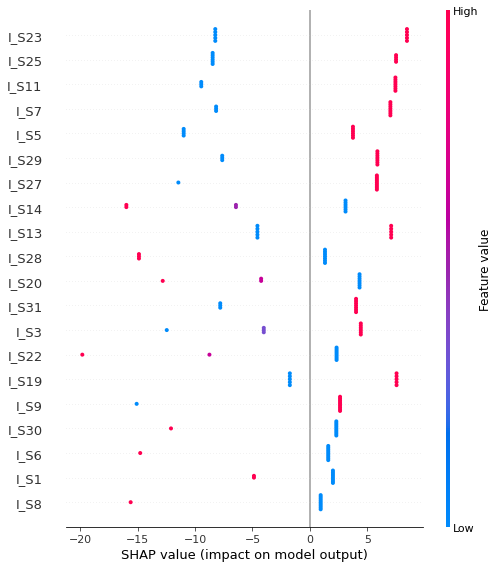

In [ ]:
shap.summary_plot(shap_values, 
                  X_test_200_300.iloc[:10, :], 
                  feature_names=features
                  )


In [ ]:
i = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:]  ,X_test_200_300.iloc[i,:],feature_names=features)

In [ ]:
shap_values_df_1

0     -4.871589
1     -0.037175
2      4.433179
3      1.094390
4      3.750355
5      1.598401
6     -8.166622
7      0.938902
8      2.626100
9      0.957459
10    -9.459042
11     1.081421
12     7.076740
13     3.103240
14    -0.764827
15     0.825140
16    -0.942175
17     0.990127
18     7.546623
19     4.323944
20    -1.568652
21     2.323528
22    -8.238897
23     1.136426
24    -8.467541
25     1.361670
26     5.832599
27   -14.885603
28    -7.633447
29     2.301185
30    -7.806556
Name: 0, dtype: float64

In [ ]:
type(shap_values)

numpy.ndarray

In [ ]:
shap_values_df = pd.DataFrame(shap_values)
shap_values_df.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-4.871589,-0.037175,4.433179,1.09439,3.750355,1.598401,-8.166622,0.938902,2.6261,0.957459,...,2.323528,-8.238897,1.136426,-8.467541,1.36167,5.832599,-14.885603,-7.633447,2.301185,-7.806556
1,2.005702,0.002059,-12.464451,1.09439,-10.990250,1.598401,7.009221,0.938902,2.6261,0.957459,...,-19.817534,8.452762,1.136426,7.502885,1.36167,5.832599,1.314598,5.877589,2.301185,4.018717
2,2.005702,-0.037175,-4.015636,1.09439,-10.990250,1.598401,7.009221,0.938902,2.6261,0.957459,...,2.323528,-8.238897,1.136426,7.502885,1.36167,5.832599,1.314598,5.877589,2.301185,4.018717
3,2.005702,0.041293,4.433179,1.09439,-10.990250,1.598401,7.009221,0.938902,2.6261,0.957459,...,2.323528,-8.238897,1.136426,-8.467541,1.36167,5.832599,1.314598,-7.633447,2.301185,4.018717
4,-4.871589,0.002059,4.433179,1.09439,3.750355,1.598401,-8.166622,-15.607984,2.6261,0.957459,...,2.323528,-8.238897,1.136426,-8.467541,1.36167,5.832599,1.314598,5.877589,2.301185,4.018717


In [ ]:
shap_values_df.to_csv('shap_values_df.csv')

In [ ]:
X_test_200_300.to_csv('X_test_200_300.csv')

In [ ]:
type(X_test_200_300)

pandas.core.frame.DataFrame

## Shapley

In [ ]:
shap_values_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-4.871589,-0.037175,4.433179,1.09439,3.750355,1.598401,-8.166622,0.938902,2.6261,0.957459,...,2.323528,-8.238897,1.136426,-8.467541,1.36167,5.832599,-14.885603,-7.633447,2.301185,-7.806556
1,2.005702,0.002059,-12.464451,1.09439,-10.990250,1.598401,7.009221,0.938902,2.6261,0.957459,...,-19.817534,8.452762,1.136426,7.502885,1.36167,5.832599,1.314598,5.877589,2.301185,4.018717
2,2.005702,-0.037175,-4.015636,1.09439,-10.990250,1.598401,7.009221,0.938902,2.6261,0.957459,...,2.323528,-8.238897,1.136426,7.502885,1.36167,5.832599,1.314598,5.877589,2.301185,4.018717
3,2.005702,0.041293,4.433179,1.09439,-10.990250,1.598401,7.009221,0.938902,2.6261,0.957459,...,2.323528,-8.238897,1.136426,-8.467541,1.36167,5.832599,1.314598,-7.633447,2.301185,4.018717
4,-4.871589,0.002059,4.433179,1.09439,3.750355,1.598401,-8.166622,-15.607984,2.6261,0.957459,...,2.323528,-8.238897,1.136426,-8.467541,1.36167,5.832599,1.314598,5.877589,2.301185,4.018717


In [ ]:
shap_values_df.iloc[0].argmin()

27

In [ ]:
shap_values_df.iloc[0, 27]

-14.885602649250483

In [ ]:
shap_values_df.iloc[0, 18]

7.546623192778244

In [ ]:
shap_values_df.iloc[0, 12]

7.076740219844163

In [ ]:
shap_values_df_1 = shap_values_df.iloc[0, :]

# Tree based Model

In [ ]:
X = df_SR
y = df[cols_all[-1]]

X.head()
y.head()

9599      28.330877
19810   -166.096723
2276      -3.133451
11685     60.716137
15848    -22.510457
Name: total_torque, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1) # 70% training and 30% test

In [ ]:
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor


gradboost = GradientBoostingRegressor(n_estimators= 5000, max_depth=6, random_state=1)
gradboost.fit(X_train, y_train)
y_hat = gradboost.predict(X_test)
print('GradBoost', metrics.mean_squared_error(y_true=y_test, y_pred=y_hat))
print('GradBoost MAE', metrics.mean_absolute_error(y_true=y_test, y_pred=y_hat))

# dt = DecisionTreeRegressor(max_depth=10)
# bagRegressor = BaggingRegressor(dt, n_estimators=150, random_state=1)
# bagRegressor.fit(X_train, y_train)
# y_hat = bagRegressor.predict(X_test)

# print('Bagging', metrics.mean_squared_error(y_true=y_test, y_pred=y_hat))

# rf = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=1)
# rf.fit(X_train, y_train)
# y_hat = rf.predict(X_test)

# print('RF', metrics.mean_squared_error(y_true=y_test, y_pred=y_hat))

GradBoost 40.37761958330754
GradBoost MAE 3.7776315500463262


In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_=GradientBoostingRegressor()

dict_para ={'n_estimators': [400, 450, 500], 'max_depth':[4, 5, 6]}

gscv=GridSearchCV(rfc_,dict_para, n_jobs=-1, verbose=3, cv=3)

gscv.fit(X, y)

KeyboardInterrupt: 

In [ ]:
gscv.best_params_

In [ ]:
results=pd.DataFrame(gscv.cv_results_)
results.head(10)

# VAE - Visualization





In [ ]:

# **VAE encoder network**

latent_dim = 3
input_shape = 31 # without rotor_displacement & Torque & Rotor
# input_shape = 35 # with rotor_displacement & Torque

encoder_inputs = keras.Input(shape=(input_shape,))
x = layers.Dense(32, activation="relu")(encoder_inputs)
x = layers.Dense(16, activation="relu")(encoder_inputs)
x = layers.Dense(8, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 31)]         0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 16)           512         input_14[0][0]                   
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 8)            136         dense_35[0][0]                   
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 3)            27          dense_36[0][0]                   
____________________________________________________________________________________________

In [ ]:
# **Latent-space-sampling layer**

import tensorflow as tf

class Sampler(layers.Layer):
    def call(self, z_mean, z_log_var):
        batch_size = tf.shape(z_mean)[0]
        z_size = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [ ]:
# **VAE decoder network, mapping latent space points to excitation pattern**

latent_inputs = keras.Input(shape=(latent_dim,))

x = layers.Dense(8, activation="relu")(latent_inputs)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)

decoder_outputs = layers.Dense(input_shape)(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_38 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_39 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_40 (Dense)             (None, 31)                1023      
Total params: 1,743
Trainable params: 1,743
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# **VAE model with custom `train_step()`**

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler(z_mean, z_log_var)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                    keras.losses.MSE(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + 0.005*tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
# **Training the VAE**
from sklearn import preprocessing

# data = df.values
data = df_SR.values

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='total_loss', patience=10)
vae_3 = VAE(encoder, decoder)
vae_3.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
vae_3.fit(data_scaled, epochs=100, batch_size=512, callbacks=[callback])


Epoch 1/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.2938 - reconstruction_loss: 0.2916 - kl_loss: 0.4466
Epoch 2/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.1649 - reconstruction_loss: 0.1599 - kl_loss: 1.0122
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - total_loss: 0.1411 - reconstruction_loss: 0.1346 - kl_loss: 1.2839
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.1211 - reconstruction_loss: 0.1118 - kl_loss: 1.8696
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - total_loss: 0.1154 - reconstruction_loss: 0.1063 - kl_loss: 1.8277
Epoch 6/100
64/64 [==============================] - 1s 10ms/step - total_loss: 0.1136 - reconstruction_loss: 0.1050 - kl_loss: 1.7244
Epoch 7/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.1126 - reconstruction_loss: 0.1042 - kl_loss: 1.6684
Epoch 8/100
64/64 [==============================] - 1s

# Data Prep for Visualization

In [ ]:
data_full = df.values
data_full[:5, -1]

array([ 10.90165409, -25.73183421,  -0.11036088, -20.26926505,
       -22.1800113 ])

In [ ]:
len(data_scaled)

32658

In [ ]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(data_scaled)), n_to_show)
example_SR = data_scaled[example_idx]
example_labels = data_full[example_idx, -1]


In [ ]:

# z1_points,z2_points = vae.encoder.predict(example_images)
sampler = Sampler()
z_mean, z_log_var = vae_3.encoder.predict(example_SR)
z_points = sampler(z_mean, z_log_var)

print(z_points.shape)

# min_x = min(z_points[:, 0])
# max_x = max(z_points[:, 0])
# min_y = min(z_points[:, 1])
# max_y = max(z_points[:, 1])


(5000, 3)


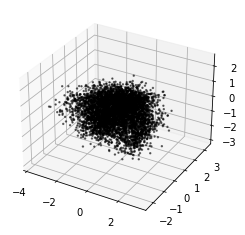

In [ ]:

fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

# plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
ax.scatter(z_points[:, 0] , z_points[:, 1], z_points[:, 2], c='black', alpha=0.5, s=2)

plt.show()

In [ ]:

n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(data_scaled)), n_to_show)
example_images = data_scaled[example_idx]
example_labels = data_full[example_idx, -1]

# z1_points,z2_points = vae.encoder.predict(example_images)
sampler = Sampler()
z_mean, z_log_var = vae_3.encoder.predict(data)
z_points = sampler(z_mean, z_log_var)



In [ ]:
p_points = norm.cdf(z_points)

print(p_points.shape)

(32658, 3)


<AxesSubplot:>

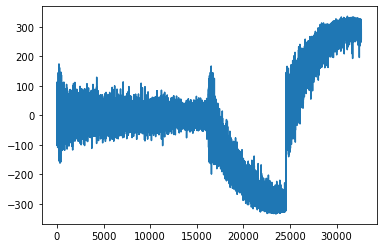

In [ ]:
torque = df.iloc[:, -1]
torque.plot()

In [ ]:
y_binned = np.digitize(data_full[:, -1], bins=[-100, -10, 10, 100])
unique, counts = np.unique(y_binned, return_counts=True)

print(np.asarray((unique, counts)).T)
print(y_binned.shape)

[[   0 7003]
 [   1 6765]
 [   2 5473]
 [   3 6543]
 [   4 6874]]
(32658,)


In [ ]:
selected_indexes = []
for cat in unique:
  indexes = np.where(y_binned==cat)
  len(indexes[0])

  selected_indexes.append(np.random.choice(indexes[0], size=1000))

selected_examples = np.concatenate((data_scaled[selected_indexes[0]], 
                                    data_scaled[selected_indexes[1]], 
                                    data_scaled[selected_indexes[2]], 
                                    data_scaled[selected_indexes[3]], 
                                    data_scaled[selected_indexes[4]]))

selected_labels = np.concatenate((y_binned[selected_indexes[0]], 
                                  y_binned[selected_indexes[1]], 
                                  y_binned[selected_indexes[2]], 
                                  y_binned[selected_indexes[3]], 
                                  y_binned[selected_indexes[4]] 
                                  ))

print(selected_examples.shape, selected_labels.shape)

(5000, 31) (5000,)


In [ ]:
unique_s, counts_s = np.unique(selected_labels, return_counts=True)

print(np.asarray((unique_s, counts_s)).T)
print(selected_labels.shape)

[[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]]
(5000,)


In [ ]:
y_binned = np.digitize(example_labels, bins=[-100, -10, 10, 100])
# y_binned = np.digitize(data_full[:, -1], bins=[-100, -10, 10, 100])

unique, counts = np.unique(y_binned, return_counts=True)

print(np.asarray((unique, counts)).T)
print(y_binned.shape)


[[   0 1107]
 [   1 1036]
 [   2  851]
 [   3  950]
 [   4 1056]]
(5000,)


In [ ]:
sampler = Sampler()
z_mean, z_log_var = vae_3.encoder.predict(selected_examples)
z_points = sampler(z_mean, z_log_var)


In [ ]:
p_points = norm.cdf(z_points)

print(p_points.shape)

(5000, 3)


# Data Visualization

<ipython-input-304-5c512c218ff2>:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



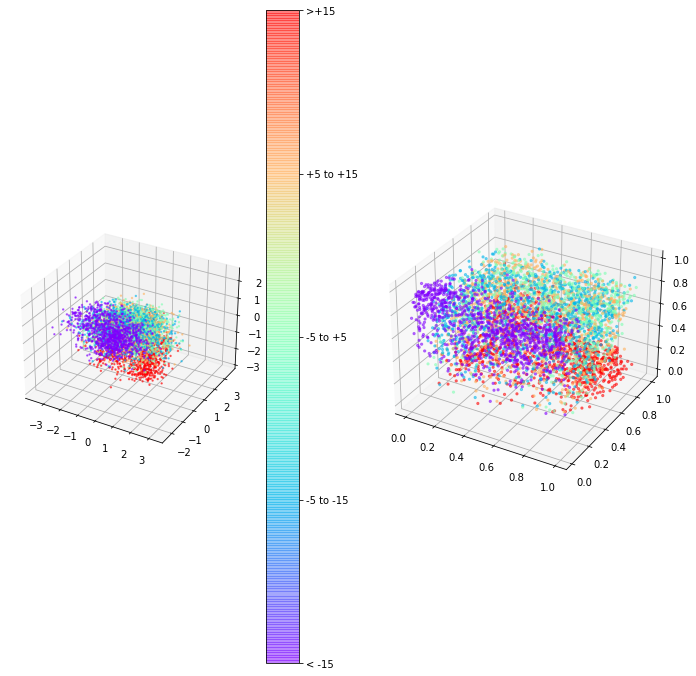

In [ ]:
figsize = 12

fig = plt.figure(figsize=(figsize, figsize))
# fig = plt.figure()


ax = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(121, projection='3d')

plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , z_points[:, 2], cmap='rainbow' , c= selected_labels
            , alpha=0.5, s=2)
cbar = plt.colorbar(plot_1, ticks=[0, 1, 2, 3, 4])
# cbar = fig.colorbar(cax, ticks=[0, 1, 2, 3, 4])
cbar.ax.set_yticklabels(['< -15', '-5 to -15', '-5 to +5', '+5 to +15', '>+15'])  


ax = fig.add_subplot(122 , projection='3d')
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , p_points[:, 2] , cmap='rainbow' , c= selected_labels
            , alpha=0.5, s=5)



plt.show()

In [ ]:
print(np.asarray((unique, counts)).T)
print(y_binned.shape)


[[   0 1107]
 [   1 1036]
 [   2  851]
 [   3  950]
 [   4 1056]]
(5000,)


Collect Samples --> Use Encoder to compress the information --> Visualize the latent info --> Use Decoder to extract the excitation pattern

In [ ]:
import plotly.graph_objects as go
import numpy as np

color_names = ['< -100', '-100 to -10', '-10 to +10', '+10 to +100', '>+100']
color_vals = [0, 1, 2, 3, 4]

fig = go.Figure(data=[go.Scatter3d(
    x=z_points[:, 0],
    y=z_points[:, 1],
    z=z_points[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=selected_labels,                # set color to an array/list of desired values
        colorscale='rainbow',   # choose a colorscale
        opacity=0.8,
        colorbar={
                  'tickvals': color_vals,
                  'ticktext': color_names,
                  'y': 0.5,
                  'len': 0.5,
                  }
    )
)])

# tight layout
fig.update_layout(
    # autosize=False,
    width=1000,
    height=1000,
    margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# VAE - Compression

In [ ]:
# **VAE encoder network**

latent_dim = 8
input_shape = 31 # without rotor_displacement & Torque & Rotor
# input_shape = 35 # with rotor_displacement & Torque

encoder_inputs = keras.Input(shape=(input_shape,))
x = layers.Dense(32, activation="relu")(encoder_inputs)
x = layers.Dense(16, activation="relu")(encoder_inputs)
x = layers.Dense(8, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 31)]         0                                            
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 16)           512         input_16[0][0]                   
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 8)            136         dense_42[0][0]                   
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 8)            72          dense_43[0][0]                   
____________________________________________________________________________________________

In [ ]:
# **Latent-space-sampling layer**

import tensorflow as tf

class Sampler(layers.Layer):
    def call(self, z_mean, z_log_var):
        batch_size = tf.shape(z_mean)[0]
        z_size = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [ ]:
# **VAE decoder network, mapping latent space points to excitation pattern**

latent_inputs = keras.Input(shape=(latent_dim,))

x = layers.Dense(8, activation="relu")(latent_inputs)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)

decoder_outputs = layers.Dense(input_shape)(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_45 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_47 (Dense)             (None, 31)                1023      
Total params: 1,783
Trainable params: 1,783
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# **VAE model with custom `train_step()`**

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler(z_mean, z_log_var)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                    keras.losses.MSE(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + 0.001*tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
# **Training the VAE**
from sklearn import preprocessing

# data = df.values
data = df_SR.values

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='total_loss', patience=10)

vae_8 = VAE(encoder, decoder)
vae_8.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
vae_8.fit(data_scaled, epochs=100, batch_size=512, callbacks=[callback])

Epoch 1/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.2843 - reconstruction_loss: 0.2838 - kl_loss: 0.5121
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - total_loss: 0.1495 - reconstruction_loss: 0.1473 - kl_loss: 2.1473
Epoch 3/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.1220 - reconstruction_loss: 0.1187 - kl_loss: 3.3032
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.1096 - reconstruction_loss: 0.1060 - kl_loss: 3.5991
Epoch 5/100
64/64 [==============================] - 1s 12ms/step - total_loss: 0.1065 - reconstruction_loss: 0.1032 - kl_loss: 3.2940
Epoch 6/100
64/64 [==============================] - 1s 12ms/step - total_loss: 0.1044 - reconstruction_loss: 0.1014 - kl_loss: 3.0186
Epoch 7/100
64/64 [==============================] - 1s 11ms/step - total_loss: 0.1024 - reconstruction_loss: 0.0995 - kl_loss: 2.8771
Epoch 8/100
64/64 [==============================] - 1s

In [ ]:
example_input = data_scaled[-1]
example_labels = data_full[-1, -1]

print(example_input, example_labels)

[0.  0.  1.  0.  1.  0.  1.  0.  1.  0.5 1.  0.  0.5 0.  0.5 0.  0.5 0.
 0.5 0.  0.5 0.  1.  0.5 1.  0.  1.  0.  1.  0.  1. ] 290.8795596602602


# Process

In [ ]:
# z1_points,z2_points = vae.encoder.predict(example_images)

data_point = data_scaled[-1]
data_point = np.expand_dims(data_point, axis=0)
print(data_point)


[[0.  0.  1.  0.  1.  0.  1.  0.  1.  0.5 1.  0.  0.5 0.  0.5 0.  0.5 0.
  0.5 0.  0.5 0.  1.  0.5 1.  0.  1.  0.  1.  0.  1. ]]


In [ ]:
sampler = Sampler()
z_mean, z_log_var = vae_8.encoder.predict(data_point)
z_points = sampler(z_mean, z_log_var)


In [ ]:
z_points

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[ 0.03629346,  1.223818  ,  1.1819855 ,  1.7874501 ,  0.05403452,
        -1.5786995 ,  0.39435837,  0.81646085]], dtype=float32)>

In [ ]:
output = vae_8.decoder.predict(z_points)
print(output)

[[ 0.14418116  0.19691636  0.8862568   0.03964755  0.91683227  0.04043205
   0.86687464  0.04266381  0.95666313  0.05234706  0.89721894  0.03317827
   0.64145833 -0.09462226  0.49128112  0.01901298  0.58481157  0.06412086
   0.5276163  -0.11803994  0.556031    0.04211181  0.753466    0.04924779
   0.9011259   0.05005959  0.9210078   0.02902308  0.9576124   0.06194864
   1.007275  ]]


# Plotly

In [ ]:
stator_exc_final = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRfYWJb8QEvHyRqj-vnQls5sZXzFUZb6HRwkbMkMr4EGnQjhjGwW_05uk7meVzb7LOnnKIa_Xzzc5FA/pub?gid=1637477844&single=true&output=csv')
stator_exc_final['r'] = 2.5
stator_position = stator_exc_final[['Stator_position', 'r']]

stator_position.head()

,Stator_position,r
0,0.000000,2.5
1,11.612903,2.5
2,23.225806,2.5
3,34.838710,2.5
4,46.451613,2.5


In [ ]:
def SetColor(x):
    if(x == -2):
        return "red"
    elif(x == +2):
        return "green"
    elif(x == 0):
        return "yellow"
    elif(x == -1):
        return "black"
    elif(x == 1):
        return "blue"

In [ ]:
from plotly.validators.scatter.marker import SymbolValidator

raw_symbols = SymbolValidator().values
raw_symbols[1:18:2]

['0',
 100,
 'circle-open',
 '200',
 300,
 'circle-open-dot',
 '1',
 101,
 'square-open']

In [ ]:
import numpy as np
rotor_positions = np.linspace(0,360,31)
rotor_positions = rotor_positions[:-1]

rotor_posn_exc_config = {key:-2*(-1)**(inx) for inx, key in enumerate(rotor_positions)}
rotor_posn_exc_config_df = pd.Series(rotor_posn_exc_config, index=rotor_posn_exc_config.keys(), name='Rotor_global_config')
rotor_posn_exc_config_df.head()

0.0    -2
12.0    2
24.0   -2
36.0    2
48.0   -2
Name: Rotor_global_config, dtype: int64

In [ ]:
y_true_stator = [i for i in data_point[0][:-2]]
y_pred_stator = [i for i in output[0]]
y_pred_stator

[0.14418116,
 0.19691636,
 0.8862568,
 0.03964755,
 0.91683227,
 0.04043205,
 0.86687464,
 0.042663805,
 0.95666313,
 0.052347064,
 0.89721894,
 0.03317827,
 0.64145833,
 -0.09462226,
 0.49128112,
 0.01901298,
 0.58481157,
 0.06412086,
 0.5276163,
 -0.11803994,
 0.556031,
 0.042111814,
 0.753466,
 0.049247786,
 0.9011259,
 0.050059587,
 0.9210078,
 0.029023081,
 0.9576124,
 0.061948642,
 1.007275]

In [ ]:
diff = data_point[0] - output[0]
diff_list = [i for i in diff]
diff_list

[-0.14418116211891174,
 -0.1969163566827774,
 0.11374318599700928,
 -0.03964754939079285,
 0.08316773176193237,
 -0.040432050824165344,
 0.13312536478042603,
 -0.042663805186748505,
 0.04333686828613281,
 0.4476529359817505,
 0.10278105735778809,
 -0.03317826986312866,
 -0.14145833253860474,
 0.09462226182222366,
 0.008718878030776978,
 -0.01901298016309738,
 -0.08481156826019287,
 -0.06412085890769958,
 -0.02761632204055786,
 0.11803994327783585,
 -0.056030988693237305,
 -0.04211181402206421,
 0.24653398990631104,
 0.45075221359729767,
 0.09887409210205078,
 -0.05005958676338196,
 0.07899218797683716,
 -0.029023081064224243,
 0.04238760471343994,
 -0.06194864213466644,
 -0.007274985313415527]

In [ ]:
color ={
   'PURPLE' : '\033[95m',
   'CYAN' : '\033[96m',
   'DARKCYAN' : '\033[36m',
   'BLUE' : '\033[94m',
   'GREEN' : '\033[92m',
   'YELLOW' : '\033[93m',
   'RED' : '\033[91m',
   'BOLD' : '\033[1m',
   'UNDERLINE' : '\033[4m',
   'END' : '\033[0m'
}
print(color['BOLD'] + 'Hello World !' + color['END'])

Hello World !


In [ ]:
color_vals2 = [-2, -1, 0, 1, 2]
color_names2 = ['-2', '-1', '0', '1', '2']

color_scale = r'rainbow'

# Plot

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}, {'type': 'polar'}]])

# Add 3 traces, one for each slider step

fig.add_trace(
    go.Scatterpolar(
        visible=True,
        r = stator_exc_final['r'].values,
        theta = stator_exc_final['Stator_position'].values,
        name="Stator_GA",
        mode='markers',
        showlegend=False,
        marker = dict(size=12,
                      symbol=raw_symbols[17],
                      color = y_true_stator,
                      colorscale=color_scale,   # choose a colorscale
                      # opacity=0.8,
                      coloraxis="coloraxis1",
                      colorbar={
                              'tickvals': color_vals2,
                              'ticktext': color_names2,
                              'y': 0.5,
                              'len': 0.5,
                              }
                    )
        ), row=1, col=1)

fig.add_trace(
    go.Scatterpolar(
        visible=True,
        r = stator_exc_final['r'].values -0.5,
        theta = rotor_positions - 0.5,
        name="Rotor_GA",
        mode='markers',
        showlegend=False,
        marker = dict(size=10,
                      symbol=raw_symbols[1],
                      color = rotor_posn_exc_config_df.values.tolist(),
                      colorscale=color_scale,   # choose a colorscale
                      coloraxis="coloraxis1",
                      colorbar={
                              'tickvals': color_vals2,
                              'ticktext': color_names2,
                              'y': 0.5,
                              'len': 0.5,
                              }
                      )
        ), row=1, col=1)

fig.add_trace(
    go.Barpolar(
        visible=True,
        r = [i +0 for i in diff_list],
        theta = stator_exc_final['Stator_position'].values,
        marker = dict(color = diff_list,
                      colorscale='rainbow',
                      # coloraxis="coloraxis1",
                      colorbar={
                              'title':'Difference',
                              'tickvals': [-0.5,-0.1, 0, 0.1, 0.5],
                              'ticktext': ['-0.5','-0.1', '0', '0.1', '0.5'],
                              'y': 0.5,
                              'len': 0.5,
                              'x': 0
                              }
                      )
    ), row=1, col=1)

fig.add_trace(
    go.Scatterpolar(
        visible=True,
        r = stator_exc_final['r'].values,
        theta = stator_exc_final['Stator_position'].values,
        name="Stator_original",
        mode='markers',
        showlegend=False,
        marker = dict(size=12,
                      symbol=raw_symbols[17],
                      color=y_pred_stator,
                      colorscale=color_scale,   # choose a colorscale
                      coloraxis="coloraxis1",
                      colorbar={
                              'tickvals': color_vals2,
                              'ticktext': color_names2,
                              'y': 0.5,
                              'len': 0.5,
                              }
                    )
        ), row=1, col=2)

fig.add_trace(
    go.Scatterpolar(
        visible=True,
        r = stator_exc_final['r'].values -0.5,
        theta = rotor_positions - 0.5,
        name="Rotor_original",
        mode='markers',
        showlegend=False,
        marker = dict(size=10,
                      symbol=raw_symbols[1],
                      color = rotor_posn_exc_config_df.values.tolist(),
                      colorscale=color_scale,   # choose a colorscale
                      coloraxis="coloraxis1",
                      colorbar={
                              'tickvals': color_vals2,
                              'ticktext': color_names2,
                              'y': 0.5,
                              'len': 0.5,
                              }                  
                      )
        ), row=1, col=2)

fig.update_layout(
    # legend_tracegroupgap = 180,
    legend=dict(
                # tracegroupgap = 180,
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01),
    title={
        'text': 'Comparison b/w <b>True Sequence </b> and  <b>de - coded</b> excitation sequence.',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show()

# VAE - Latent Arithmatic

In [ ]:
unique_s, counts_s = np.unique(selected_labels, return_counts=True)

print(np.asarray((unique_s, counts_s)).T)
print(selected_labels.shape)

[[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]]
(5000,)


In [ ]:
latent_dim = 8

In [ ]:
def get_vector_from_label(current_label=0, target_label=1):

    origin = np.zeros(shape = latent_dim, dtype = 'float32')
    current_sum_POS = np.zeros(shape = latent_dim, dtype = 'float32')
    current_n_POS = 0
    current_mean_POS = np.zeros(shape = latent_dim, dtype = 'float32')

    current_sum_NEG = np.zeros(shape = latent_dim, dtype = 'float32')
    current_n_NEG = 0
    current_mean_NEG = np.zeros(shape = latent_dim, dtype = 'float32')

    current_vector = np.zeros(shape = latent_dim, dtype = 'float32')
    current_dist = 0

    # print('label: ' + label)
    print('images : POS move : NEG move :distance : 𝛥 distance')
    # while(current_n_POS < 1000):

    for inx in range(int(selected_labels.shape[0]/250)):

        select_idx = np.random.choice(range(int(selected_labels.shape[0])), 250)
        im = selected_examples[select_idx]
        attribute = selected_labels[select_idx]
        attribute_current = current_label
        attribute_target = target_label

        # _,_,z = vae_3.encoder.predict(np.array(im))
        z_mean, z_log_var = vae_8.encoder.predict(im)
        z = sampler(z_mean, z_log_var)

        z_POS = z[attribute==attribute_target]
        z_NEG = z[attribute==attribute_current]
        new_mean_POS = 0
        new_mean_NEG = 0
        movement_POS = 0
        movement_NEG = 0
        # print(len(z_POS), len(z_NEG))

        if len(z_POS) > 0:
            current_sum_POS = current_sum_POS + np.sum(z_POS, axis = 0)
            current_n_POS += len(z_POS)
            new_mean_POS = current_sum_POS / current_n_POS
            movement_POS = np.linalg.norm(new_mean_POS-current_mean_POS)

        if len(z_NEG) > 0: 
            current_sum_NEG = current_sum_NEG + np.sum(z_NEG, axis = 0)
            current_n_NEG += len(z_NEG)
            new_mean_NEG = current_sum_NEG / current_n_NEG
            movement_NEG = np.linalg.norm(new_mean_NEG-current_mean_NEG)

        current_vector = new_mean_POS-new_mean_NEG
        new_dist = np.linalg.norm(current_vector)
        dist_change = new_dist - current_dist

        print(str(current_n_POS)
              + '    : ' + str(np.round(movement_POS,3))
              + '    : ' + str(np.round(movement_NEG,3))
              + '    : ' + str(np.round(new_dist,3))
              + '    : ' + str(np.round(dist_change,3))
             )

        current_mean_POS = np.copy(new_mean_POS)
        current_mean_NEG = np.copy(new_mean_NEG)
        current_dist = np.copy(new_dist)

        if np.sum([movement_POS, movement_NEG]) < 0.01:
            current_vector = current_vector / current_dist
            print('Found the vector')
            break

    return current_vector   

In [ ]:
feature_vec = get_vector_from_label(current_label=0, target_label=2)
print(feature_vec)

images : POS move : NEG move :distance : 𝛥 distance
42    : 1.769    : 2.533    : 2.649    : 2.649
97    : 0.283    : 0.265    : 2.584    : -0.066
149    : 0.109    : 0.128    : 2.584    : 0.0
199    : 0.085    : 0.103    : 2.648    : 0.064
252    : 0.057    : 0.081    : 2.681    : 0.033
310    : 0.09    : 0.036    : 2.661    : -0.02
352    : 0.047    : 0.033    : 2.644    : -0.017
402    : 0.051    : 0.035    : 2.639    : -0.005
444    : 0.032    : 0.03    : 2.641    : 0.002
498    : 0.037    : 0.039    : 2.638    : -0.003
549    : 0.026    : 0.015    : 2.636    : -0.002
598    : 0.019    : 0.027    : 2.616    : -0.02
651    : 0.021    : 0.016    : 2.62    : 0.003
700    : 0.026    : 0.018    : 2.622    : 0.003
756    : 0.017    : 0.029    : 2.618    : -0.005
816    : 0.023    : 0.028    : 2.624    : 0.006
867    : 0.015    : 0.024    : 2.618    : -0.006
916    : 0.022    : 0.022    : 2.623    : 0.005
972    : 0.023    : 0.013    : 2.627    : 0.003
1014    : 0.013    : 0.017    : 2.61

In [ ]:
select_idx = np.random.choice(range(2000, 3000), 1)
im = selected_examples[select_idx]
attribute = selected_labels[select_idx]

factors = [-4,-3,-2,-1,0,1,2,3,4]

print(im)
print('a:', attribute)

z_mean, z_log_var = vae_8.encoder.predict(im)
z_point = sampler(z_mean, z_log_var)


for factor in factors:

    changed_z_point = z_points[0] + feature_vec * factor
    # changed_image = vae_8.decoder.predict(np.array([changed_z_point]))[0]

# print(z_point)
# changed_z_point = z_point[0] + feature_vec * 1

    print('factor=', factor, end='\t')
    # , 'changed_z_point', changed_z_point)
    changed_seq = vae_8.decoder.predict(np.array([changed_z_point]))[0]
    # print('factor=', factor, 'changed_seq', changed_seq)

    print(gradboost.predict(changed_seq.reshape(1, -1))[0])

# factors = [-4,-3,-2,-1,0,1,2,3,4]
# changed_seqs = {}

# for factor in factors:
#   changed_z_point = z_point[0] + feature_vec * factor
#   changed_seq = vae_3.decoder.predict(np.array([changed_z_point]))[0]
#   changed_seqs[factors]=changed_seq


[[0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.  0.5 1.  1.  0.5
  0.  0.  0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0. ]]
a: [2]
factor= -4	[-41.63705473]
factor= -3	[-18.16369876]
factor= -2	[-6.8652006]
factor= -1	[-2.25012967]
factor= 0	[2.80402378]
factor= 1	[63.72527288]
factor= 2	[62.6900138]
factor= 3	[88.58264993]
factor= 4	[103.24049198]


In [ ]:
def add_vector_to_images(feature_vec):

    n_to_show = 5
    factors = [-4,-3,-2,-1,0,1,2,3,4]

    example_batch = next(data_flow_generic)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    _,_,z_points = vae.encoder.predict(example_images)

    fig = plt.figure(figsize=(18, 10))

    counter = 1

    for i in range(n_to_show):

        img = example_images[i].squeeze()
        sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
        sub.axis('off')        
        sub.imshow(img)

        counter += 1

        for factor in factors:

            changed_z_point = z_points[i] + feature_vec * factor
            changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

            img = changed_image.squeeze()
            sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
            sub.axis('off')
            sub.imshow(img)

            counter += 1

    plt.show()


In [ ]:
add_vector_to_images(eyeglasses_vec)
